# Data Exploration

In [1]:
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re

import pandas, numpy
import pandas as pd 
import numpy as np

from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from random import random
from collections           import defaultdict
from gensim.models.phrases import Phrases, Phraser

from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('C:/AI/alphavox/Bradesco5/Training.csv', encoding='latin-1') 

In [4]:
df1

,Unnamed: 0,level_0,Unnamed: 0.1,index,ID,NOME,DATA_NASCIMENTO,SEXO,IDADE,RENDA (R$),...,FONE10,STATUS_TELEFONE_10,idade,idade_range,classe,tipo_tel,classe1,idade_range_x,area,sexo1
0,0,0,0,0,6.000000e+13,CARLOS LUCIANO DOS SANTOS,20/10/1982,M,37,880,...,NaN,NaN,39,FAIXA-05,E,1,1,5,75,0
1,1,1,1,1,6.000000e+13,FRANCISCA MARTINS ALVES,18/05/1950,F,70,950,...,NaN,NaN,71,FAIXA-12,E,1,1,12,64,1
2,2,2,2,2,6.000000e+13,RAIMUNDA FEIJAO VIANA,26/10/1948,F,71,880,...,NaN,NaN,73,FAIXA-12,E,0,1,12,93,1
3,3,3,3,3,6.000000e+13,LUCIANA SANTOS DE SOUSA,23/03/1973,F,47,1200,...,NaN,NaN,48,FAIXA-07,E,1,1,7,11,1
4,4,4,4,4,6.000000e+13,PAMELA KAREN FERNANDES DOS SANTOS,25/03/1988,F,32,1750,...,1.998331e+10,ATENDEU,33,FAIXA-04,E,1,1,4,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,107997,107997,107997,107997,6.000000e+13,WALLISSON LIMA SOARES,02/11/1987,M,32,900,...,NaN,NaN,34,FAIXA-04,E,1,1,4,38,0
107998,107998,107998,107998,107998,6.000000e+13,NEI BRITO DOS SANTOS,22/03/1974,M,46,900,...,NaN,NaN,47,FAIXA-07,E,1,1,7,94,0
107999,107999,107999,107999,107999,6.000000e+13,TATIANE FERREIRA SANTOS,13/09/1985,F,34,880,...,NaN,NaN,36,FAIXA-05,E,0,1,5,98,1
108000,108000,108000,108000,108000,6.000000e+13,RAFAEL DA SILVA FERNANDES,11/01/1996,M,24,900,...,NaN,NaN,25,FAIXA-03,E,0,1,3,21,0


(array([74795.,     0., 33207.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

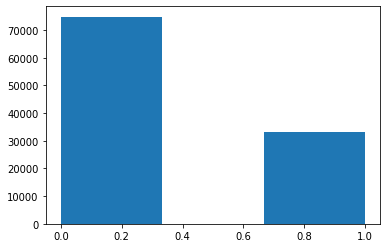

In [5]:
#histogram measurement LABEL ACESSO ()
import matplotlib.pyplot as plt
plt.hist(df1.LABEL_ACESSO, bins=3)

In [7]:
df1['LABEL_ACESSO'].value_counts()[:50]

0    74795
1    33207
Name: LABEL_ACESSO, dtype: int64

(array([107029.,      0.,    973.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

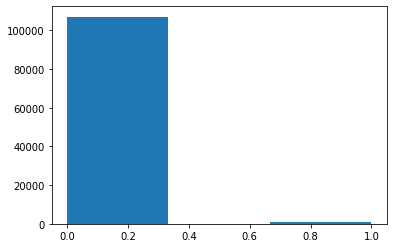

In [6]:
#histogram measurement LABEL SUCESSO)
import matplotlib.pyplot as plt
plt.hist(df1.LABEL_SUCESSO, bins=3)

In [8]:
df1['LABEL_SUCESSO'].value_counts()[:50]

0    107029
1       973
Name: LABEL_SUCESSO, dtype: int64

(array([53187.,     0., 54815.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

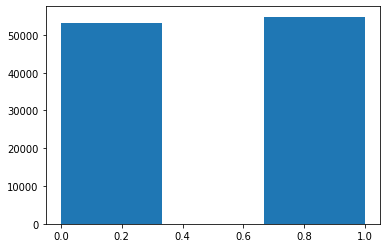

In [10]:
#histogram measurement SEXO)
import matplotlib.pyplot as plt
plt.hist(df1.sexo1, bins=3)

(array([32605., 47794., 27603.]),
 array([ 2.,  6., 10., 14.]),
 <a list of 3 Patch objects>)

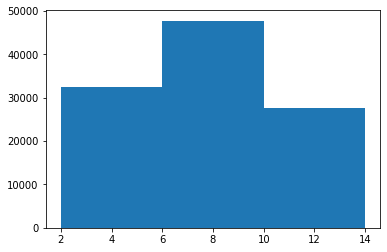

In [12]:
#histogram measurement idade)
import matplotlib.pyplot as plt
plt.hist(df1.idade_range_x, bins=3)

In [14]:
df1['idade_range'].value_counts()[:50]

FAIXA-04    14340
FAIXA-07    13038
FAIXA-08    12622
FAIXA-05    12377
FAIXA-06    11947
FAIXA-09    10187
FAIXA-10     9128
FAIXA-11     8018
FAIXA-12     5722
FAIXA-03     5468
FAIXA-13     4035
FAIXA-14      700
FAIXA-02      420
Name: idade_range, dtype: int64

In [15]:
df1['idade'].value_counts()[:50]

31    3065
32    3051
33    2984
51    2765
52    2738
45    2696
47    2683
34    2667
39    2605
46    2604
30    2573
48    2564
35    2519
50    2515
49    2490
44    2480
40    2474
36    2444
53    2441
38    2414
37    2395
42    2384
41    2308
43    2301
55    2181
56    2167
54    2163
57    2108
58    1897
61    1879
63    1878
59    1834
64    1809
62    1787
60    1775
67    1761
29    1748
65    1731
66    1676
69    1443
68    1407
28    1266
70    1212
71    1195
72    1148
73    1134
27    1093
74    1033
75     940
76     835
Name: idade, dtype: int64

(array([91105., 13902.,  2995.]),
 array([0.        , 1.33333333, 2.66666667, 4.        ]),
 <a list of 3 Patch objects>)

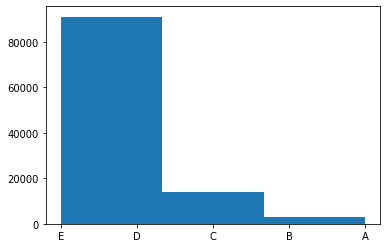

In [16]:
#histogram measurement renda)
import matplotlib.pyplot as plt
plt.hist(df1.classe, bins=3)

In [17]:
df1['classe'].value_counts()[:50]

E    78579
C    13902
D    12526
B     2893
A      102
Name: classe, dtype: int64